In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Data sets
data = pd.read_csv('application_data.csv')
prev_data = pd.read_csv('previous_application.csv')
columns_data = pd.read_csv('columns_description.csv',  encoding='cp1252')
pd.set_option('display.max_columns',None) # Used to display the all features

## Let's consider the 'application_data' for data cleaning.
* identifying and treating missing values.
* outliers detection and treatment.
* data transformation
* Feature selection.

In [3]:
data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
data.shape

(307511, 122)

In [5]:
data.info(verbose=True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [7]:
datatype = data.columns.to_series().groupby(data.dtypes).groups
{k.name: v for k, v in datatype.items()} # seperates various datatypes features nto groups.

{'int64': Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
        'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
        'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
        'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
        'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
        'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
        'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
        'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
        'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
        'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
        'FLAG_DOCUMENT_21'],
       dtype='object'),
 'float64': Index(['A

In [8]:
num_cols_data = ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
        'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
        'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
        'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
        'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
        'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
        'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
        'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
        'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
        'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
        'FLAG_DOCUMENT_21', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
        'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
        'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
        'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
        'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
        'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
        'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
        'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
        'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
        'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
        'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
        'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
        'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
        'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
        'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
        'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
        'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
        'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
        'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
        'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
        'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [9]:
data[num_cols_data].head(10)

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,-9461,-637,-2120,1,1,0,1,1,0,2,2,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,-16765,-1188,-291,1,1,0,1,1,0,1,1,11,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,-19046,-225,-2531,1,1,1,1,1,0,2,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,0,0,2,2,17,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,0,0,2,2,11,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [10]:
data_missing_num = pd.DataFrame(data[num_cols_data].isnull().sum())  
data_missing_num.columns = ['missing']
data_missing_num['%'] = data_missing_num.missing.apply(lambda x : round(x/data.shape[0]*100,2))
data_missing_num[data_missing_num['%']>0]

,missing,%
AMT_GOODS_PRICE,278,0.09
OWN_CAR_AGE,202929,65.99
EXT_SOURCE_1,173378,56.38
EXT_SOURCE_2,660,0.21
EXT_SOURCE_3,60965,19.83
APARTMENTS_AVG,156061,50.75
BASEMENTAREA_AVG,179943,58.52
YEARS_BEGINEXPLUATATION_AVG,150007,48.78
YEARS_BUILD_AVG,204488,66.50
COMMONAREA_AVG,214865,69.87


In [11]:
obj_cols_data = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
        'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
        'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

In [12]:
data[obj_cols_data].head(10)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,NaN,NaN,NaN,NaN
6,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
7,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,NaN,NaN,NaN,NaN
8,Cash loans,F,N,Y,Children,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA,NaN,NaN,NaN,NaN
9,Revolving loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,THURSDAY,Electricity,NaN,NaN,NaN,NaN


In [13]:
data_missing_obj = pd.DataFrame(data[obj_cols_data].isnull().sum()) 
data_missing_obj.columns = ['missing']
data_missing_obj['%'] = data_missing_obj.missing.apply(lambda x : round(x/data.shape[0]*100,2))
data_missing_obj[data_missing_obj.missing>0]

,missing,%
NAME_TYPE_SUITE,1292,0.42
OCCUPATION_TYPE,96391,31.35
FONDKAPREMONT_MODE,210295,68.39
HOUSETYPE_MODE,154297,50.18
WALLSMATERIAL_MODE,156341,50.84
EMERGENCYSTATE_MODE,145755,47.40


In [14]:
for i in obj_cols_data:
    print(round(data[i].value_counts(normalize=True)*100,2))
    print('Description : ',columns_data[(columns_data.Table == 'application_data') & (columns_data.Row == i)].Description.values[0],'\n')

Cash loans         90.48
Revolving loans     9.52
Name: NAME_CONTRACT_TYPE, dtype: float64
Description :  Identification if loan is cash or revolving 

F      65.83
M      34.16
XNA     0.00
Name: CODE_GENDER, dtype: float64
Description :  Gender of the client 

N    65.99
Y    34.01
Name: FLAG_OWN_CAR, dtype: float64
Description :  Flag if the client owns a car 

Y    69.37
N    30.63
Name: FLAG_OWN_REALTY, dtype: float64
Description :  Flag if client owns a house or flat 

Unaccompanied      81.16
Family             13.11
Spouse, partner     3.71
Children            1.07
Other_B             0.58
Other_A             0.28
Group of people     0.09
Name: NAME_TYPE_SUITE, dtype: float64
Description :  Who was accompanying client when he was applying for the loan 

Working                 51.63
Commercial associate    23.29
Pensioner               18.00
State servant            7.06
Unemployed               0.01
Student                  0.01
Businessman              0.00
Maternity leave   

Findings:
1. Gender has XNA value, which is close to 0%, we'll drop this values.
2. NAME_TYPE_SUITE is 81% no one and 19% family ( family, partner, kids ). This feature is unbalanced with no significant value for analysis.
3. NAME_FAMILY_STATUS has value 'married' and 'civil marriage;, which account same so we can merge them.
4. NAME_HOUSING_TYPE -> It looks like 88% owns house/apartment and only 1.59% rented apartment, Which Seems like bit low or poeple might have chose the option 'House/Apartment' even though the House/Apartment is rented. We'll try to come up with a solution to solve this confusion.
5. ORGANIZATION_TYPE -> We have 'Industry', 'Business Entity', 'Trade' and 'Transport', repeated with multiple types, We'll merge into these values since no further information regarding the type of the organizations under these values.
6. FONDKAPREMONT_MODE -> The description, which doesn't explain what this columns does.Since no much info on this column let's drop it.
7. HOUSETYPE_MODE -> the column description provided is a generalized description for multiple column. ['Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor']. the values also distributed like [block of flats 98.23, specific housing 0.98, terraced house 0.79] which not only highly biased [98.23%, 0.98%, 0.79%] also doesn't make much of sense without specific any description.
8. EMERGENCYSTATE_MODE -> Data is highly biased and the description doesn't explain the actual meaning of this data.

In [15]:
data = data[data.CODE_GENDER != 'XNA']

Merging ORGANIZATION_TYPE values into specific variables.

In [16]:
data['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [17]:
replacement_rules = {'Business Entity Type 3' : 'Business Entity',
'Business Entity Type 2' : 'Business Entity',
'Business Entity Type 1' : 'Business Entity',
'Transport: type 2' : 'Transport',
'Transport: type 4' : 'Transport',
'Transport: type 3' : 'Transport',
'Transport: type 1' : 'Transport',
'Industry: type 11' : 'Industry',
'Industry: type 1' : 'Industry',
'Industry: type 4' : 'Industry',
'Industry: type 7' : 'Industry',
'Industry: type 3' : 'Industry',
'Industry: type 9' : 'Industry',
'Industry: type 2' : 'Industry',
'Industry: type 12' : 'Industry',
'Industry: type 5' : 'Industry',
'Industry: type 10' : 'Industry',
'Industry: type 13' : 'Industry',
'Industry: type 8' : 'Industry',
'Industry: type 6' : 'Industry',
'Trade: type 7' : 'Trade',
'Trade: type 2' : 'Trade',
'Trade: type 3' : 'Trade',
'Trade: type 6' : 'Trade',
'Trade: type 1' : 'Trade',
'Trade: type 5' : 'Trade',
'Trade: type 4' : 'Trade'}
data.ORGANIZATION_TYPE = data.ORGANIZATION_TYPE.replace(replacement_rules)

In [18]:
data['ORGANIZATION_TYPE'].value_counts(normalize=True)

Business Entity        0.274882
XNA                    0.180074
Self-employed          0.124914
Other                  0.054252
Trade                  0.046552
Industry               0.046536
Medicine               0.036396
Government             0.033833
Transport              0.029235
School                 0.028920
Kindergarten           0.022370
Construction           0.021856
Security               0.010559
Housing                0.009619
Military               0.008566
Bank                   0.008153
Agriculture            0.007980
Police                 0.007613
Postal                 0.007014
Security Ministries    0.006419
Restaurant             0.005889
Services               0.005122
University             0.004315
Hotel                  0.003141
Electricity            0.003089
Insurance              0.001941
Telecom                0.001876
Emergency              0.001821
Advertising            0.001395
Realtor                0.001288
Culture                0.001232
Mobile  

In [19]:
cols_to_drop = ['NAME_TYPE_SUITE','NAME_HOUSING_TYPE','HOUSETYPE_MODE','FONDKAPREMONT_MODE']
for key in cols_to_drop:
    print(data[key].value_counts(normalize=True))
    print('Description : ',columns_data[(columns_data.Table == 'application_data') & (columns_data.Row == key)].Description.values[0],'\n')

Unaccompanied      0.811596
Family             0.131110
Spouse, partner    0.037131
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64
Description :  Who was accompanying client when he was applying for the loan 

House / apartment      0.887346
With parents           0.048259
Municipal apartment    0.036363
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64
Description :  What is the housing situation of the client (renting, living with parents, ...) 

block of flats      0.982305
specific housing    0.009784
terraced house      0.007911
Name: HOUSETYPE_MODE, dtype: float64
Description :  Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, nu

In [20]:
round(data.NAME_FAMILY_STATUS.value_counts(normalize=True)*100,2)

Married                 63.88
Single / not married    14.78
Civil marriage           9.68
Separated                6.43
Widow                    5.23
Unknown                  0.00
Name: NAME_FAMILY_STATUS, dtype: float64

In [21]:
#Let's make the Civil Marriage to Married.
data.NAME_FAMILY_STATUS = data.NAME_FAMILY_STATUS.replace({'Civil marriage':'Married'})
print("New unique values after updating the values")
print(round(data.NAME_FAMILY_STATUS.value_counts(normalize=True)*100,2))

New unique values after updating the values
Married                 73.56
Single / not married    14.78
Separated                6.43
Widow                    5.23
Unknown                  0.00
Name: NAME_FAMILY_STATUS, dtype: float64


In [22]:
data['HOUSETYPE_MODE'].value_counts()/len(data)*100

block of flats      48.941975
specific housing     0.487469
terraced house       0.394137
Name: HOUSETYPE_MODE, dtype: float64

In [23]:
data['NAME_HOUSING_TYPE'].value_counts()/len(data)*100

House / apartment      88.734565
With parents            4.825906
Municipal apartment     3.636340
Rented apartment        1.587281
Office apartment        0.851038
Co-op apartment         0.364870
Name: NAME_HOUSING_TYPE, dtype: float64

In [24]:
# Let's drop the columns
data1 = data.copy()
print('Columns before dropping :',data1.shape[1])
data1 = data1.drop(cols_to_drop, axis=1)
print('Columns after dropping :',data1.shape[1])

Columns before dropping : 122
Columns after dropping : 118


In [25]:
data_missing = pd.DataFrame(round(data1.isnull().sum()/data1.shape[0]*100,2)).reset_index()
data_missing.columns = ['col_name','missing']
data_missing['desc'] = data_missing['col_name'].apply(lambda x: str(columns_data[(columns_data.Table == 'application_data') & (columns_data.Row == x)].Description.values[0]))
perc = 0
print("Total",data_missing[data_missing.missing>perc].shape[0],"columns are having more than "+str(perc)+"% recors missing")
data_missing[data_missing.missing>perc].sort_values('missing', ascending=False)

Total 61 columns are having more than 0% recors missing


,col_name,missing,desc
46,COMMONAREA_AVG,69.87,Normalized information about building where th...
74,COMMONAREA_MEDI,69.87,Normalized information about building where th...
60,COMMONAREA_MODE,69.87,Normalized information about building where th...
54,NONLIVINGAPARTMENTS_AVG,69.43,Normalized information about building where th...
82,NONLIVINGAPARTMENTS_MEDI,69.43,Normalized information about building where th...
...,...,...,...
89,OBS_60_CNT_SOCIAL_CIRCLE,0.33,How many observation of client's social surrou...
88,DEF_30_CNT_SOCIAL_CIRCLE,0.33,How many observation of client's social surrou...
87,OBS_30_CNT_SOCIAL_CIRCLE,0.33,How many observation of client's social surrou...
40,EXT_SOURCE_2,0.21,Normalized score from external data source


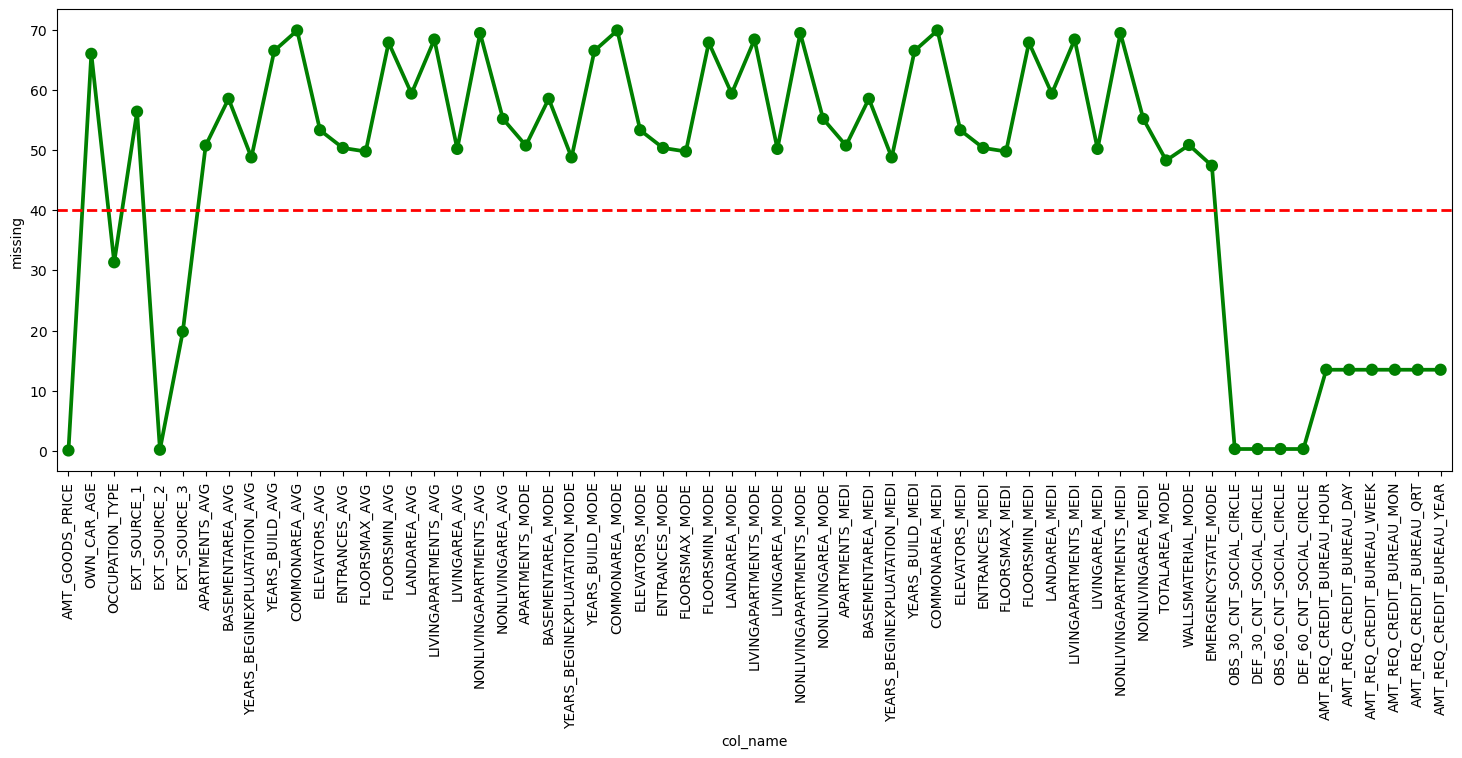

In [26]:
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="col_name" , y="missing" , data = data_missing[data_missing.missing>0], color='green')
plt.xticks(rotation=90)
ax.axhline(y=40, color='red', linestyle='dashed', linewidth=2)
plt.show()  

Findings:
Most columns are having missing values above 40%.

In [27]:
# data with 40% or more data missing
perc = 40
print("Total",data_missing[data_missing.missing>perc].shape[0],"columns are having more than "+str(perc)+"% records missing")
cols_to_test = data_missing[data_missing.missing>perc].sort_values('missing', ascending=False).col_name
data_missing[data_missing.missing>perc].sort_values('missing', ascending=False)

Total 47 columns are having more than 40% records missing


,col_name,missing,desc
74,COMMONAREA_MEDI,69.87,Normalized information about building where th...
46,COMMONAREA_AVG,69.87,Normalized information about building where th...
60,COMMONAREA_MODE,69.87,Normalized information about building where th...
54,NONLIVINGAPARTMENTS_AVG,69.43,Normalized information about building where th...
68,NONLIVINGAPARTMENTS_MODE,69.43,Normalized information about building where th...
82,NONLIVINGAPARTMENTS_MEDI,69.43,Normalized information about building where th...
80,LIVINGAPARTMENTS_MEDI,68.36,Normalized information about building where th...
66,LIVINGAPARTMENTS_MODE,68.36,Normalized information about building where th...
52,LIVINGAPARTMENTS_AVG,68.36,Normalized information about building where th...
78,FLOORSMIN_MEDI,67.85,Normalized information about building where th...


In [28]:
round(data1.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100,2)

Cash loans         90.48
Revolving loans     9.52
Name: NAME_CONTRACT_TYPE, dtype: float64

In [29]:
for i in data1.NAME_CONTRACT_TYPE.unique():
    print("---",i,"---")
    print(round(data1[data1.NAME_CONTRACT_TYPE == i][cols_to_test].isnull().sum()/data1[data1.NAME_CONTRACT_TYPE == i].shape[0]*100,2))
    print('\n')

--- Cash loans ---
COMMONAREA_MEDI                 70.17
COMMONAREA_AVG                  70.17
COMMONAREA_MODE                 70.17
NONLIVINGAPARTMENTS_AVG         69.75
NONLIVINGAPARTMENTS_MODE        69.75
NONLIVINGAPARTMENTS_MEDI        69.75
LIVINGAPARTMENTS_MEDI           68.67
LIVINGAPARTMENTS_MODE           68.67
LIVINGAPARTMENTS_AVG            68.67
FLOORSMIN_MEDI                  68.19
FLOORSMIN_MODE                  68.19
FLOORSMIN_AVG                   68.19
YEARS_BUILD_MEDI                66.85
YEARS_BUILD_MODE                66.85
YEARS_BUILD_AVG                 66.85
OWN_CAR_AGE                     66.05
LANDAREA_AVG                    59.78
LANDAREA_MEDI                   59.78
LANDAREA_MODE                   59.78
BASEMENTAREA_MODE               58.93
BASEMENTAREA_AVG                58.93
BASEMENTAREA_MEDI               58.93
EXT_SOURCE_1                    56.79
NONLIVINGAREA_MEDI              55.60
NONLIVINGAREA_MODE              55.60
NONLIVINGAREA_AVG              

Fro above table we can tell the data is Missing Competely at Random (MCAR) which if dropped does not affect the inference of the output variable.

In [30]:
data2 = data1.copy()
print("Number of columns before dropping",data2.shape[1])
print("Number of columns to drop",len(cols_to_test))
data2 = data2.drop(cols_to_test, axis=1)
print("Number of columns after dropping",data2.shape[1])

Number of columns before dropping 118
Number of columns to drop 47
Number of columns after dropping 71


In [31]:
data_missing = pd.DataFrame(data2.isnull().sum()).reset_index()
data_missing.columns = ['col_name','missing']
data_missing['%'] = data_missing.missing.apply(lambda x: round(x/data2.shape[0]*100,2))
data_missing['desc'] = data_missing['col_name'].apply(lambda x: str(columns_data[(columns_data.Table == 'application_data') & (columns_data.Row == x)].Description.values[0]))
data_missing['type'] = data_missing.col_name.apply(lambda x: data2[x].dtype)
perc = 0
print("Total",data_missing[data_missing['%']>perc].shape[0],"columns are having more than "+str(perc)+"% records missing")
data_missing[data_missing['%']>perc].sort_values('missing', ascending=False)

Total 14 columns are having more than 0% records missing


,col_name,missing,%,desc,type
25,OCCUPATION_TYPE,96389,31.35,What kind of occupation does the client have,object
39,EXT_SOURCE_3,60965,19.83,Normalized score from external data source,float64
65,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.50,Number of enquiries to Credit Bureau about the...,float64
66,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.50,Number of enquiries to Credit Bureau about the...,float64
67,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.50,Number of enquiries to Credit Bureau about the...,float64
68,AMT_REQ_CREDIT_BUREAU_MON,41519,13.50,Number of enquiries to Credit Bureau about the...,float64
69,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50,Number of enquiries to Credit Bureau about the...,float64
70,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50,Number of enquiries to Credit Bureau about the...,float64
40,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33,How many observation of client's social surrou...,float64
41,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.33,How many observation of client's social surrou...,float64


Findings:
1. OCCUPATION_TYPE has more than 30% of data missing, which is of type string, So the best approach is to flag these missing values as 'missing'
2. EXT_SOURCE_3 has less than 20% data missing, but it's not specified which score and how it's relevent to study. Though we can't provide any quality insight without much of information, But we might find some pattern over here. So we'll flag as missing values. same approach for EXT_SOURCE_2 which has only 0.2% missing data
3. AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR has exact 13.5% data missing. most likely due to missing data on similar records, it's best to leave them as missing values so these can be excluded from the visualization.
4. OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCL has 0.33% data missing, I will use same approach as the others. We'll treat them as missing values and exclude from visualization.
5. AMT_GOODS_PRICE as per description it is mentioned for "consumer loans". But we have only cash loan and revolving loan in NAME_CONTRACT_TYPE.Since we have ambiguity in this information, We'll drop this column and will not use it for the EDA. 

In [32]:
# Flagging Missing values in Occupation Type
data2.OCCUPATION_TYPE.fillna('missing', inplace=True)

In [33]:
data2[~data2.AMT_GOODS_PRICE.isnull()]['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [34]:
# Let's drop the column AMT_GOODS_PRICE since no consumer loan is flagged
data3 = data2.copy()
print("Number of columns before dropping",data3.shape[1])
data3 = data3.drop('AMT_GOODS_PRICE', axis=1)
print("Number of columns after dropping",data3.shape[1])

Number of columns before dropping 71
Number of columns after dropping 70


In [35]:
# Let's again plot the missing values which has more than 0 records but less than 1%
data_missing[(data_missing.missing > 0 ) & (data_missing['%']< 0.09)]

,col_name,missing,%,desc,type
9,AMT_ANNUITY,12,0.0,Loan annuity,float64
26,CNT_FAM_MEMBERS,2,0.0,How many family members does client have,float64
44,DAYS_LAST_PHONE_CHANGE,1,0.0,How many days before application did client ch...,float64


In [36]:
# Let's drop these records, as these are very insignificant
print("Number of records before dropping",data3.shape[0])
data3 = data3.dropna(subset=['AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'])
print("Number of records after dropping",data3.shape[0])

Number of records before dropping 307507
Number of records after dropping 307492


In [37]:
data_describe = pd.DataFrame(round(data3.describe().T,1)).reset_index()
data_describe['describe'] = data_describe['index'].apply(lambda x: str(columns_data[(columns_data.Table == 'application_data') & (columns_data.Row == x)].Description.values[0]) )

In [38]:
data_describe[(data_describe['max']!=1) & (data_describe['index'] != 'SK_ID_CURR')]

,index,count,mean,std,min,25%,50%,75%,max,describe
2,CNT_CHILDREN,307492.0,0.4,0.7,0.0,0.0,0.0,1.0,19.0,Number of children the client has
3,AMT_INCOME_TOTAL,307492.0,168796.1,237129.4,25650.0,112500.0,146812.5,202500.0,117000000.0,Income of the client
4,AMT_CREDIT,307492.0,599030.7,402496.0,45000.0,270000.0,513531.0,808650.0,4050000.0,Credit amount of the loan
5,AMT_ANNUITY,307492.0,27108.6,14493.9,1615.5,16524.0,24903.0,34596.0,258025.5,Loan annuity
6,REGION_POPULATION_RELATIVE,307492.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,Normalized population of region where client l...
7,DAYS_BIRTH,307492.0,-16037.1,4364.0,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0,Client's age in days at the time of application
8,DAYS_EMPLOYED,307492.0,63819.1,141279.2,-17912.0,-2760.0,-1213.0,-289.0,365243.0,How many days before the application the perso...
9,DAYS_REGISTRATION,307492.0,-4986.1,3522.9,-24672.0,-7479.0,-4504.0,-2010.0,0.0,How many days before the application did clien...
10,DAYS_ID_PUBLISH,307492.0,-2994.2,1509.5,-7197.0,-4299.0,-3254.0,-1720.0,0.0,How many days before the application did clien...
17,CNT_FAM_MEMBERS,307492.0,2.2,0.9,1.0,2.0,2.0,3.0,20.0,How many family members does client have


In [39]:
data_describe[(data_describe['75%']<0) & (data_describe['index'] != 'SK_ID_CURR')]

,index,count,mean,std,min,25%,50%,75%,max,describe
7,DAYS_BIRTH,307492.0,-16037.1,4364.0,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0,Client's age in days at the time of application
8,DAYS_EMPLOYED,307492.0,63819.1,141279.2,-17912.0,-2760.0,-1213.0,-289.0,365243.0,How many days before the application the perso...
9,DAYS_REGISTRATION,307492.0,-4986.1,3522.9,-24672.0,-7479.0,-4504.0,-2010.0,0.0,How many days before the application did clien...
10,DAYS_ID_PUBLISH,307492.0,-2994.2,1509.5,-7197.0,-4299.0,-3254.0,-1720.0,0.0,How many days before the application did clien...
33,DAYS_LAST_PHONE_CHANGE,307492.0,-962.9,826.8,-4292.0,-1570.0,-757.0,-274.0,0.0,How many days before application did client ch...


Findings: 
1. DAYS_BIRTH, DAYS_REGISTRATION, DAYS_ID_PUBLISH and DAYS_LAST_PHONE_CHANGE should be changed from -ve to positive
except all has 75% or more values greater than years, and convert into years for clarification. 
2. DAYS_LAST_PHONE_CHANGE has nearly 75% of data greater than year. we convert into years
3. DAYS_EMPLOYED has maximum value 365243, which should be marked as na, since it looks inapropriate and also the values are -ve, which should be changed to positive.
4. we will check outliers for AMT_INCOME_TOTAL,AMT_CREDIT and AMT_ANNUITY

In [40]:
# Let's convert the negative values to +ve and change it in years
data3.DAYS_EMPLOYED = data3.DAYS_EMPLOYED.apply(lambda x: abs(x))
data3.DAYS_BIRTH = data3.DAYS_BIRTH.apply(lambda x: abs(round(x/365,2)))
data3.DAYS_REGISTRATION = data3.DAYS_REGISTRATION.apply(lambda x: abs(round(x/365,2)))
data3.DAYS_ID_PUBLISH = data3.DAYS_ID_PUBLISH.apply(lambda x: abs(round(x/365,2)))
data3.DAYS_LAST_PHONE_CHANGE = data3.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(round(x/365,2)))

In [41]:
data3.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,0.018801,25.92,637,9.99,5.81,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity,0.262949,0.139376,2.0,2.0,2.0,2.0,3.11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,0.003541,45.93,1188,3.25,0.80,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,0.010032,52.18,225,11.67,6.93,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Married,0.008019,52.07,3039,26.94,6.68,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity,0.650442,NaN,2.0,0.0,2.0,0.0,1.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,0.028663,54.61,3038,11.81,9.47,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,3.03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,State servant,Secondary / secondary special,Married,0.035792,46.41,1588,13.62,1.31,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,6.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,Commercial associate,Higher education,Married,0.035792,37.75,3130,3.32,1.70,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity,0.724000,0.492060,1.0,0.0,1.0,0.0,4.28,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,State servant,Higher education,Married,0.003122,51.64,449,12.59,6.52,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,2.93,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,Pensioner,Secondary / secondary special,Married,0.018634,55.07,365243,20.35,9.63,1,0,0,1,0,0,missing,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.

In [42]:
data3_missing = pd.DataFrame(data3.isnull().sum()).reset_index()
data3_missing.columns = ['col_name','missing']
data3_missing['%'] = data3_missing.missing.apply(lambda x: round(x/data3.shape[0]*100,2))

In [43]:
data3[data3.DAYS_EMPLOYED >= 350000].shape[0]/data3.shape[0]*100

18.00827338597427

In [44]:
# It looks like the Days employed marked as 365243 is due to the data is missing. Let's Explore more on this. finding occupation types associated with it
print(data3[data3.DAYS_EMPLOYED >= 350000].OCCUPATION_TYPE.value_counts(normalize=True))

missing           0.999964
Cleaning staff    0.000036
Name: OCCUPATION_TYPE, dtype: float64


In [45]:
#Almost all occupation data is missing. Which clearly states the Days employed is missing for these values Let's see what's the story behind the Cleaning Staff value here

# verifying if 'cleaning staff' was added here as a mistake
data3[(data3.DAYS_EMPLOYED>350000) & (data3.OCCUPATION_TYPE=='Cleaning staff')].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
134327,255803,0,Revolving loans,F,N,Y,0,135000.0,337500.0,16875.0,Pensioner,Secondary / secondary special,Married,0.006671,58.15,365243,19.07,12.05,1,0,0,1,1,0,Cleaning staff,2.0,2,2,FRIDAY,10,0,0,0,0,0,0,XNA,0.723151,NaN,2.0,0.0,2.0,0.0,3.53,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
242307,380511,0,Revolving loans,F,N,Y,0,94500.0,135000.0,6750.0,Pensioner,Secondary / secondary special,Married,0.014520,57.37,365243,18.54,10.86,1,0,0,1,1,0,Cleaning staff,2.0,2,2,SUNDAY,8,0,0,0,0,0,0,XNA,0.673530,0.160489,3.0,1.0,3.0,1.0,4.01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


count     4651.000000
mean      2131.155665
std       2105.914662
min         16.000000
25%        685.000000
50%       1477.000000
75%       2883.000000
max      16236.000000
Name: DAYS_EMPLOYED, dtype: float64


<Axes: >

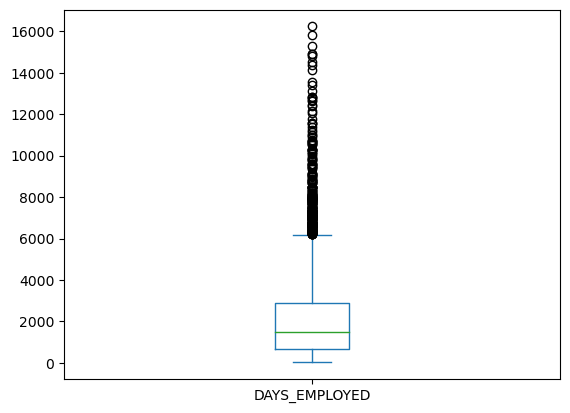

In [46]:
# Let's see how usually cleaning staff are recorded
print(data3[(data3.DAYS_EMPLOYED<350000) & (data3.OCCUPATION_TYPE=='Cleaning staff')].DAYS_EMPLOYED.describe())
data3[(data3.DAYS_EMPLOYED<350000) & (data3.OCCUPATION_TYPE=='Cleaning staff')].DAYS_EMPLOYED.plot.box()

In [47]:
print(data3[(data3.DAYS_EMPLOYED>=350000) & (data3.DAYS_BIRTH >=40)].DAYS_EMPLOYED.describe())

count     54737.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64


count       10.000000
mean      4945.800000
std       4289.076637
min       1346.000000
25%       1725.500000
50%       2801.000000
75%       7382.750000
max      12865.000000
Name: DAYS_EMPLOYED, dtype: float64
<bound method Series.mode of 18196      1346
33165      5111
106630     2341
108373    11194
113694    12865
124165     1895
134595     8140
206030     3261
274863     1636
291644     1669
Name: DAYS_EMPLOYED, dtype: int64>


<Axes: >

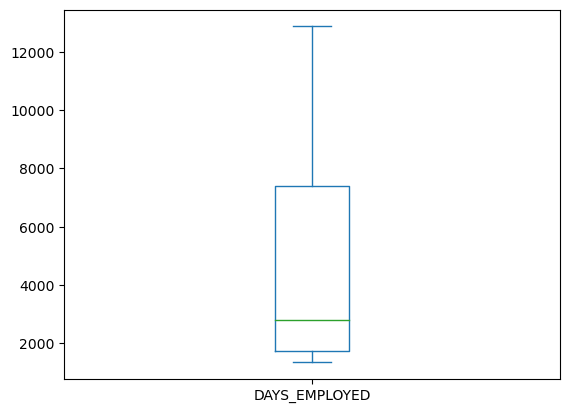

In [48]:
##### let's see usually how pensioners are recorded
print(data3[(data3.DAYS_EMPLOYED<350000) & (data3.NAME_INCOME_TYPE=='Pensioner')].DAYS_EMPLOYED.describe())
print(data3[(data3.DAYS_EMPLOYED<350000) & (data3.NAME_INCOME_TYPE=='Pensioner')].DAYS_EMPLOYED.mode)
data3[(data3.DAYS_EMPLOYED<350000) & (data3.NAME_INCOME_TYPE=='Pensioner')].DAYS_EMPLOYED.plot.box()

In [49]:
print(data3[(data3.DAYS_EMPLOYED<350000) & (data3.NAME_INCOME_TYPE=='Pensioner') & (data3.OCCUPATION_TYPE=='Cleaning staff')].shape)

(0, 70)


In [50]:
data3.loc[(data3.DAYS_EMPLOYED<350000) & (data3.OCCUPATION_TYPE=='Cleaning staff'),'DAYS_EMPLOYED']  = 4945

In [51]:
# Confirming the filled values
print(data3[data3.DAYS_EMPLOYED >= 350000].OCCUPATION_TYPE.value_counts(normalize=True))

missing           0.999964
Cleaning staff    0.000036
Name: OCCUPATION_TYPE, dtype: float64


In [52]:
# Marking the rest of the values np.null
data3.loc[(data3.DAYS_EMPLOYED>350000), 'DAYS_EMPLOYED'] = float('nan')

In [53]:
# Marked null
data3[(data3.DAYS_EMPLOYED>350000)].value_counts(normalize=True)

Series([], dtype: float64)

In [54]:
#let's if DAYS_EMPLOYED has majority of values in year
data3.DAYS_EMPLOYED.describe()

count    252118.000000
mean       2436.079391
std        2345.911330
min           0.000000
25%         783.000000
50%        1688.000000
75%        3308.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

In [55]:
# There are some days employed 0 values. 
data3[data3.DAYS_EMPLOYED<=0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
23691,127568,0,Cash loans,F,N,N,2,189000.0,983299.5,36571.5,Working,Higher education,Separated,0.025164,34.55,0.0,5.8,12.20,1,1,0,1,0,0,missing,3.0,2,2,FRIDAY,8,0,0,0,0,0,0,Business Entity,0.323724,0.379100,0.0,0.0,0.0,0.0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
121625,241013,1,Cash loans,F,N,Y,1,112500.0,134775.0,7438.5,Working,Secondary / secondary special,Married,0.007020,41.24,0.0,12.6,12.01,1,1,1,1,1,0,Sales staff,3.0,2,2,MONDAY,10,0,0,0,1,0,1,Self-employed,0.558081,0.609276,0.0,0.0,0.0,0.0,1.68,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
#It looks like the values are missing, since only few records are there we can drop these records and it shouldn't cause much of an issue
data3 = data3[data3.DAYS_EMPLOYED>0]
data3.DAYS_EMPLOYED.describe()

count    252116.000000
mean       2436.098716
std        2345.910600
min           1.000000
25%         783.000000
50%        1688.000000
75%        3308.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

In [57]:
# Let's convert the DAYS_EMPLOYED value to years again
data3.DAYS_EMPLOYED = data3.DAYS_EMPLOYED.apply(lambda x: abs(round(x/365,2)))  
data3.DAYS_EMPLOYED.describe()

count    252116.000000
mean          6.674285
std           6.427184
min           0.000000
25%           2.150000
50%           4.620000
75%           9.060000
max          49.070000
Name: DAYS_EMPLOYED, dtype: float64

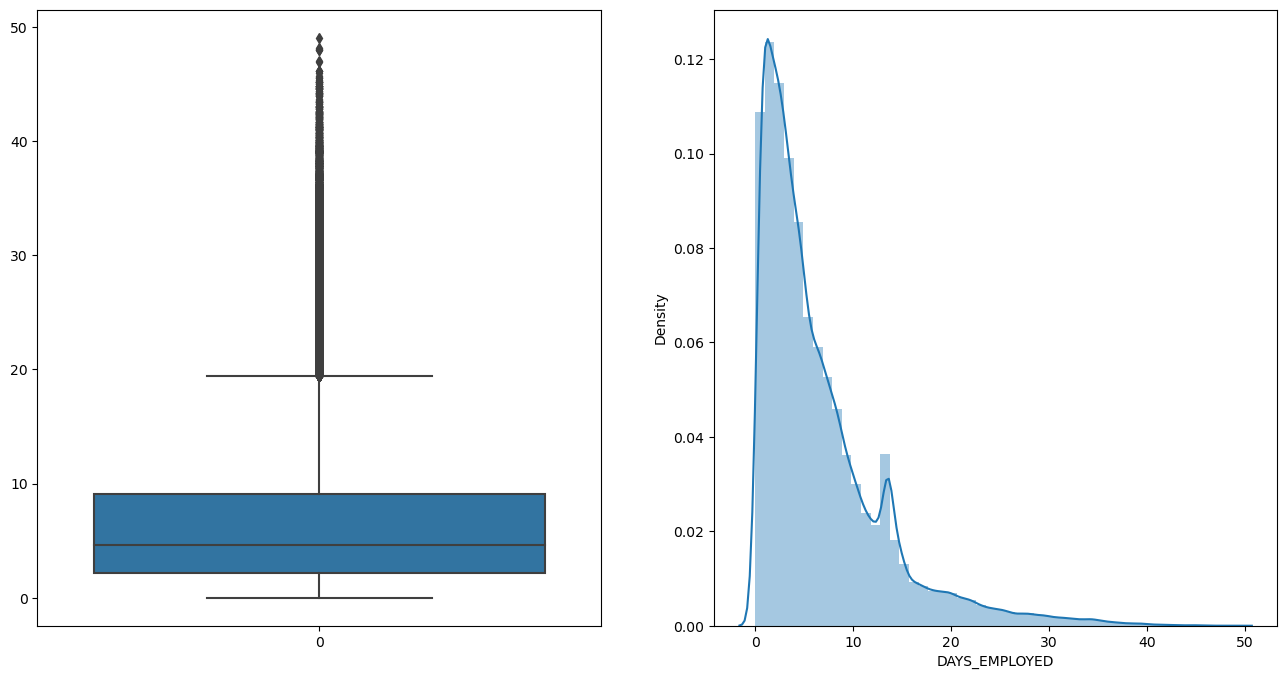

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.boxplot(data3[data3.DAYS_EMPLOYED <= 350000].DAYS_EMPLOYED, ax=axes[0])
sns.distplot(data3[data3.DAYS_EMPLOYED <= 350000].DAYS_EMPLOYED, ax=axes[1])
plt.show()

In [59]:
# Let's do the same for other 2 columns as well
cols_to_desc = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY']
def describeCols(col):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    sns.boxplot(data3[col], ax=axes[0])
    sns.distplot(data3[col], ax=axes[1])
    plt.show()

---- : AMT_INCOME_TOTAL : ----
Income of the client


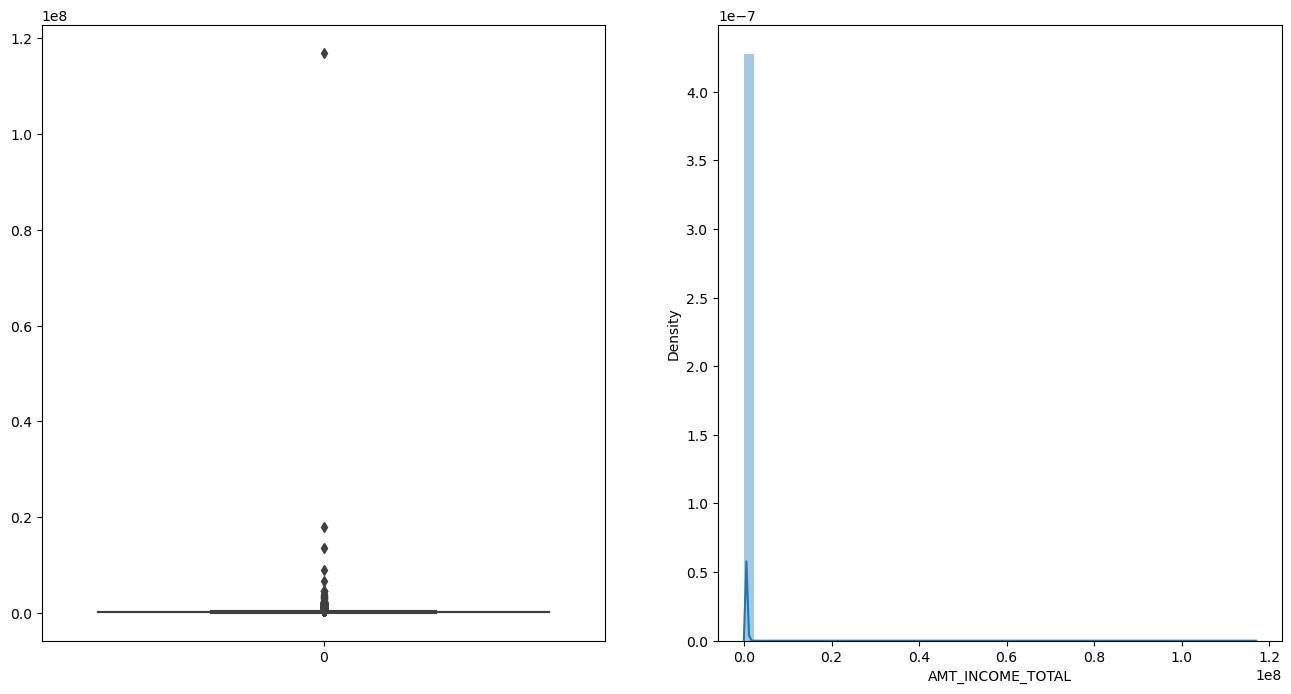

---- : AMT_CREDIT : ----
Credit amount of the loan


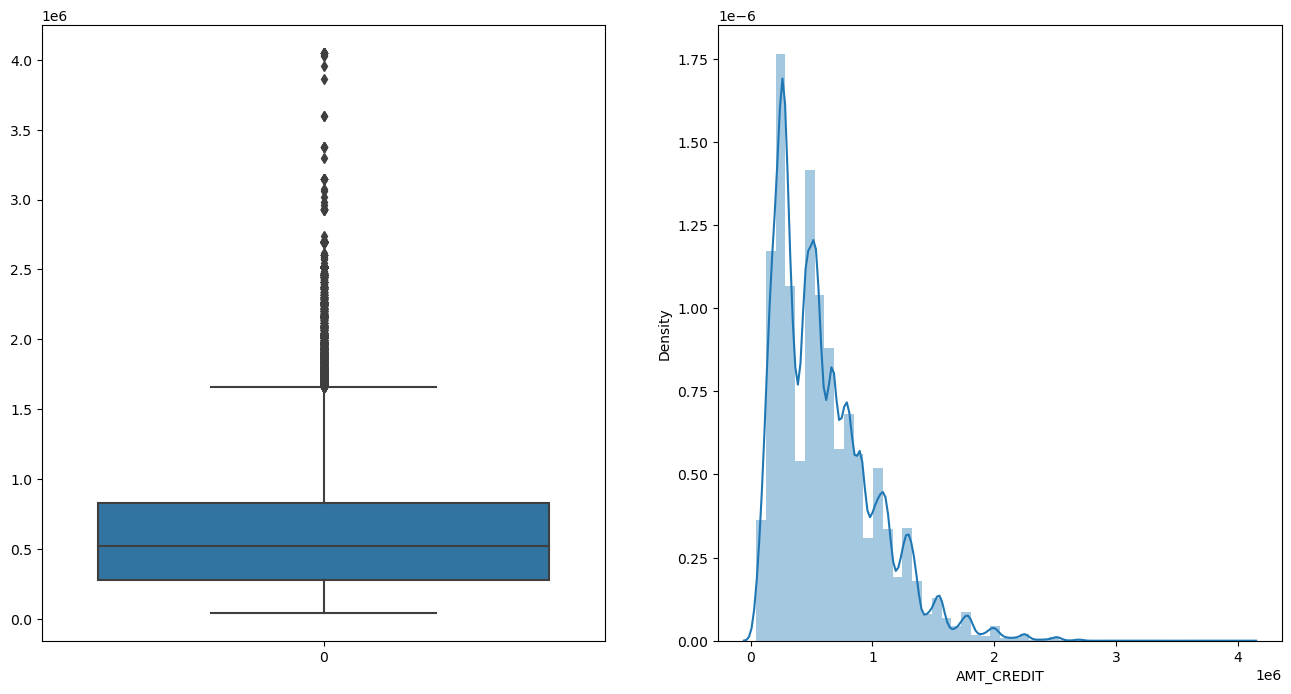

---- : AMT_ANNUITY : ----
Loan annuity


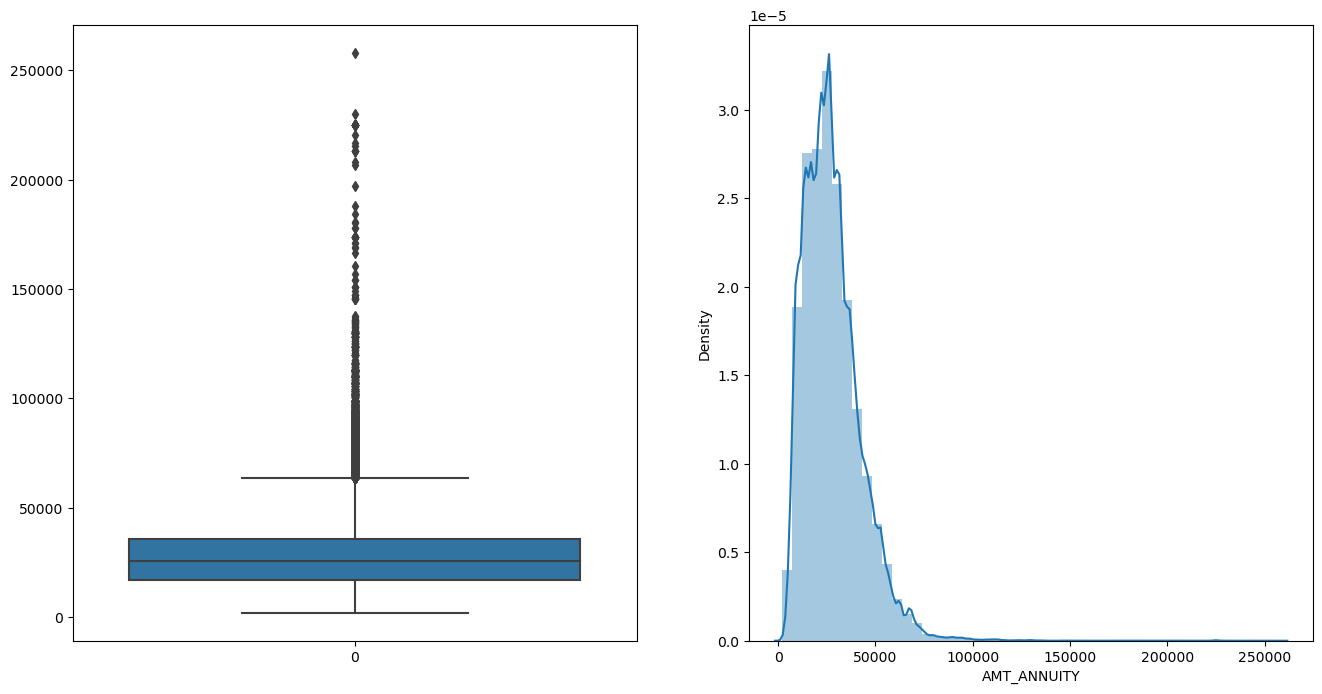

In [60]:
for col in cols_to_desc:
    print("---- :",col,": ----")
    print(columns_data[(columns_data.Table == 'application_data') & (columns_data.Row == col)].Description.values[0])
    describeCols(col)

In [61]:
round(data3.AMT_INCOME_TOTAL.quantile([0.5,0.75,0.8,0.9,0.95,0.99,1]))

0.50       157500.0
0.75       211500.0
0.80       225000.0
0.90       270000.0
0.95       355345.0
0.99       517500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

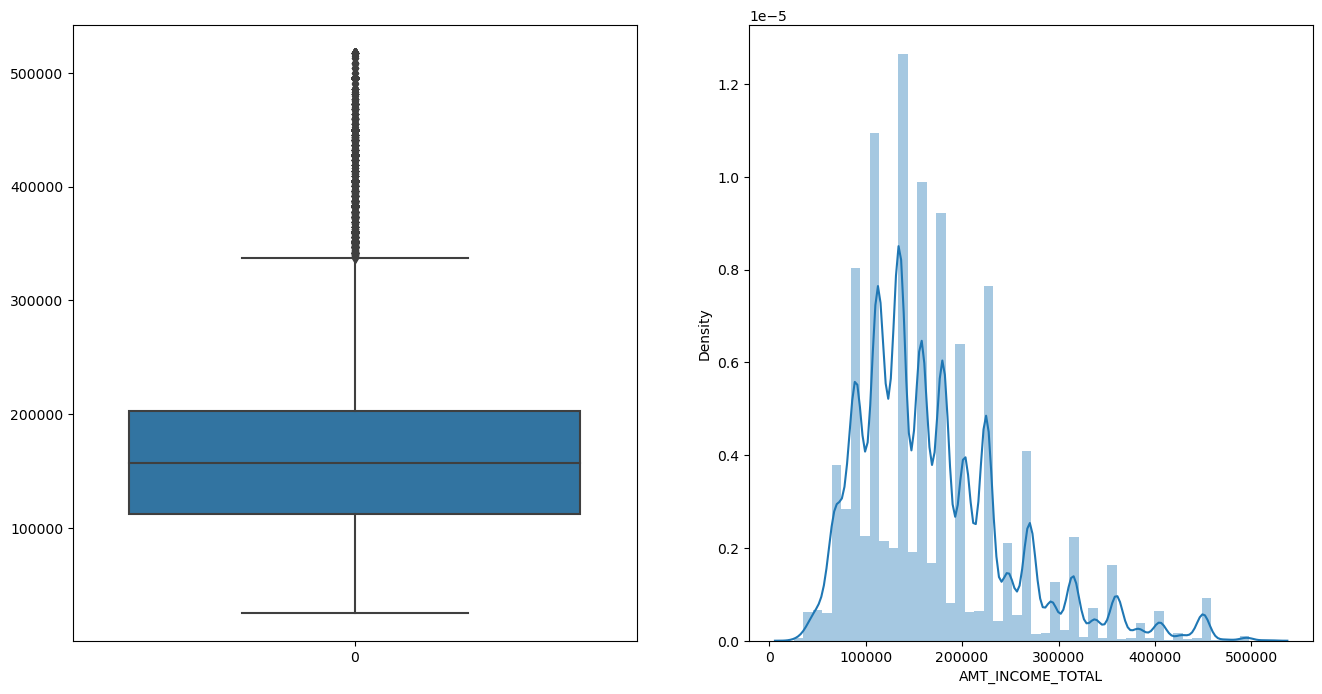

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.boxplot(data3[data3.AMT_INCOME_TOTAL <= 517500.0].AMT_INCOME_TOTAL, ax=axes[0])
sns.distplot(data3[data3.AMT_INCOME_TOTAL <= 517500.0].AMT_INCOME_TOTAL, ax=axes[1])
plt.show()

In [63]:
print(data3[data3.AMT_INCOME_TOTAL >=  600000.0].shape[0])
round(data3[data3.AMT_INCOME_TOTAL >=  600000.0].shape[0]/data3.shape[0]*100,2)

1518


0.6

In [64]:
data4 = data3.copy()
data4 = data4[data4.AMT_INCOME_TOTAL < 600000]
data4.shape

(250598, 70)

In [65]:
data4.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,0.018801,25.92,1.75,9.99,5.81,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity,0.262949,0.139376,2.0,2.0,2.0,2.0,3.11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,0.003541,45.93,3.25,3.25,0.80,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,0.010032,52.18,0.62,11.67,6.93,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Married,0.008019,52.07,8.33,26.94,6.68,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity,0.650442,NaN,2.0,0.0,2.0,0.0,1.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,0.028663,54.61,8.32,11.81,9.47,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,3.03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,State servant,Secondary / secondary special,Married,0.035792,46.41,4.35,13.62,1.31,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,6.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,Commercial associate,Higher education,Married,0.035792,37.75,8.58,3.32,1.70,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity,0.724000,0.492060,1.0,0.0,1.0,0.0,4.28,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,State servant,Higher education,Married,0.003122,51.64,1.23,12.59,6.52,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,2.93,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,Working,Secondary / secondary special,Single / not married,0.019689,39.64,5.53,39.55,10.94,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,0.746644,NaN,2.0,0.0,2.0,0.0,4.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [66]:
# Let's Re -describe table
data_describe = pd.DataFrame(round(data4.describe().T,1)).reset_index()
data_describe['describe'] = data_describe['index'].apply(lambda x: str(columns_data[(columns_data.Table == 'application_data') & (columns_data.Row == x)].Description.values[0]) )
data_describe[(data_describe['max']!=1) & (data_describe['index'] != 'SK_ID_CURR')]

,index,count,mean,std,min,25%,50%,75%,max,describe
2,CNT_CHILDREN,250598.0,0.5,0.8,0.0,0.0,0.0,1.0,19.0,Number of children the client has
3,AMT_INCOME_TOTAL,250598.0,171188.1,82253.5,25650.0,112500.0,157500.0,203400.0,599998.5,Income of the client
4,AMT_CREDIT,250598.0,608181.4,402790.3,45000.0,276277.5,521280.0,819792.0,4050000.0,Credit amount of the loan
5,AMT_ANNUITY,250598.0,27654.1,14314.2,1980.0,17019.0,25726.5,35523.0,225000.0,Loan annuity
6,REGION_POPULATION_RELATIVE,250598.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,Normalized population of region where client l...
7,DAYS_BIRTH,250598.0,40.5,10.0,20.5,32.2,39.9,48.1,69.0,Client's age in days at the time of application
8,DAYS_EMPLOYED,250598.0,6.7,6.4,0.0,2.1,4.6,9.1,49.1,How many days before the application the perso...
9,DAYS_REGISTRATION,250598.0,12.7,8.9,0.0,5.1,11.7,19.1,62.8,How many days before the application did clien...
10,DAYS_ID_PUBLISH,250598.0,7.7,4.2,0.0,4.1,7.9,11.4,19.7,How many days before the application did clien...
17,CNT_FAM_MEMBERS,250598.0,2.3,0.9,1.0,2.0,2.0,3.0,20.0,How many family members does client have


## Let's consider the 'previous_data' for data cleaning.
* identifying and treating missing values.
* outliers detection and treatment.

In [67]:
print("'previous applications' rows : ",prev_data.shape[0],", cols : ",prev_data.shape[1])
prev_data.head()

'previous applications' rows :  1670214 , cols :  37


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [69]:
# Let's list out all columns grouped by the dtype
g = prev_data.columns.to_series().groupby(prev_data.dtypes).groups
{k.name: v for k, v in g.items()}

{'int64': Index(['SK_ID_PREV', 'SK_ID_CURR', 'HOUR_APPR_PROCESS_START',
        'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA'],
       dtype='object'),
 'float64': Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
        'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
        'RATE_INTEREST_PRIVILEGED', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING',
        'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
        'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
       dtype='object'),
 'object': Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
        'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
        'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
        'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
        'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
        'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
       dtype='object')}

In [70]:
# Let's display couple of records from object columns to see if any of numerical values are identified as object
obj_cols = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
        'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
        'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
        'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
        'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
        'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']
prev_data[obj_cols].head(10)

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest
1,Cash loans,THURSDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,Cash loans,TUESDAY,Y,XNA,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
3,Cash loans,MONDAY,Y,XNA,Approved,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
4,Cash loans,THURSDAY,Y,Repairs,Refused,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,high,Cash Street: high
5,Cash loans,SATURDAY,Y,Everyday expenses,Approved,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low_normal,Cash X-Sell: low
6,Cash loans,TUESDAY,Y,XNA,Canceled,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,XNA,XNA,Cash
7,Cash loans,MONDAY,Y,XNA,Canceled,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,XNA,XNA,Cash
8,Cash loans,MONDAY,Y,XNA,Canceled,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,XNA,XNA,Cash
9,Cash loans,SATURDAY,Y,XNA,Canceled,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,XNA,XNA,Cash


In [71]:
for i in obj_cols:
    print(round(prev_data[i].value_counts(normalize=True)*100,2))
    print('Description : ',columns_data[(columns_data.Table == 'previous_application.csv') & (columns_data.Row == i)].Description.values[0],'\n')

Cash loans         44.76
Consumer loans     43.66
Revolving loans    11.57
XNA                 0.02
Name: NAME_CONTRACT_TYPE, dtype: float64
Description :  Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application 

TUESDAY      15.27
WEDNESDAY    15.27
MONDAY       15.18
FRIDAY       15.09
THURSDAY     14.91
SATURDAY     14.41
SUNDAY        9.86
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64
Description :  On which day of the week did the client apply for previous application 

Y    99.49
N     0.51
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64
Description :  Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract 

XAP                                 55.24
XNA                                 40.59
Repairs                              1.42
Other                                0.93
Urgent needs                         0.50
Buying a used car        

Findings:
1. XNA is repeated in lot of columns,There's no much information provided on what these values means. But from how it's distributed and name we can assume This is a flag created for missing value / The Column is not Applicable for the type of application.
2. NAME_CONTRACT_TYPE has 0.02% records which is marked as XNA, We'll drop this records as we won't loose much of information.
3. FLAG_LAST_APPL_PER_CONTRACT, As per column description displayed above it is flag for technical or clerical mistakes and it's occurance very low as per the values shown, 99.5% it's 'Y', makes the data highly biased and we can drop since these doesn't provide much insights for status of the case.
4. NAME_CASH_LOAN_PURPOSE Also has 95% of the data either XNA ( possibly miss flag or marking non Cash Loan) and XPA which is not clear. Due to the same we can drop this column.
5. CODE_REJECT_REASON has 9 reasons given, since The values provided is not explained and there's no much information we can gather outside regarding the keyword used. CODE_REJECT_REASON is not useful in this EDA we have to drop the column.
6. NAME_TYPE_SUITE This might give correlation but the accompanying party should not have influence in processing loan. Hence We can ignore this Column.
7. NAME_PORTFOLIO has some value marked as 'cars' instead of 'cards'
8. NAME_PRODUCT_TYPE has 60% XNA, Rest is 'x-sell' or 'x-walk-in'. There's no much information given about What product type and what x-sell and x-walk-in actually meant by.
9. NAME_YIELD_GROUP has value 'low_action', 'low_normal' which can be combined to 'low'. Overall distribution will be evenly distributed if low is combined.
10. PRODUCT_COMBINATION will be droped as it is a derived field from NAME_PORTFOLIO, NAME_PRODUCT_TYPE, NAME_YIELD_GROUP.

In [72]:
# let's drop the columns and move data new df called prev1 as checkpoint
prev1 = prev_data.drop(['CODE_REJECT_REASON','FLAG_LAST_APPL_PER_CONTRACT','NAME_CASH_LOAN_PURPOSE','NAME_TYPE_SUITE','PRODUCT_COMBINATION'], axis=1)
print(prev1.shape)
prev1.head()

(1670214, 32)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,1,0.0,0.182832,0.867336,Approved,-73,Cash through the bank,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,1,NaN,NaN,NaN,Approved,-164,XNA,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,1,NaN,NaN,NaN,Approved,-301,Cash through the bank,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,1,NaN,NaN,NaN,Approved,-512,Cash through the bank,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,1,NaN,NaN,NaN,Refused,-781,Cash through the bank,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# Let's see if x-sell and x-walk-in value in NAME_PRODUCT_TYPE has any association to other columns ( like only applicable to certain type application or cash methods) 
prev1[prev1.NAME_PRODUCT_TYPE == 'x-sell'].head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,1,NaN,NaN,NaN,Approved,-164,XNA,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,1,NaN,NaN,NaN,Approved,-301,Cash through the bank,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,1,NaN,NaN,NaN,Approved,-512,Cash through the bank,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,1,NaN,NaN,NaN,Approved,-684,Cash through the bank,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
10,1715995,447712,Cash loans,11368.620,270000.0,335754.0,NaN,270000.0,FRIDAY,7,1,NaN,NaN,NaN,Approved,-735,Cash through the bank,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,54.0,low_normal,365243.0,-705.0,885.0,-345.0,-334.0,1.0
11,2257824,161140,Cash loans,13832.775,211500.0,246397.5,NaN,211500.0,FRIDAY,10,1,NaN,NaN,NaN,Approved,-815,Cash through the bank,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,30.0,middle,365243.0,-785.0,85.0,-725.0,-721.0,1.0
12,2330894,258628,Cash loans,12165.210,148500.0,174361.5,NaN,148500.0,TUESDAY,15,1,NaN,NaN,NaN,Approved,-860,Cash through the bank,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,high,365243.0,-830.0,-140.0,-200.0,-197.0,1.0
17,1285768,142748,Revolving loans,9000.000,180000.0,180000.0,NaN,180000.0,FRIDAY,13,1,NaN,NaN,NaN,Approved,-336,XNA,Repeater,XNA,Cards,x-sell,AP+ (Cash loan),6,XNA,0.0,XNA,-277.0,-257.0,365243.0,365243.0,365243.0,0.0
18,2393109,396305,Cash loans,10181.700,180000.0,180000.0,NaN,180000.0,THURSDAY,14,1,NaN,NaN,NaN,Approved,-700,Cash through the bank,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,24.0,low_normal,NaN,NaN,NaN,NaN,NaN,NaN
20,1506815,166490,Cash loans,25454.025,450000.0,491580.0,NaN,450000.0,MONDAY,6,1,NaN,NaN,NaN,Refused,-401,Cash through the bank,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,low_normal,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
prev1[prev1.NAME_PRODUCT_TYPE == 'walk-in'].head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,1,NaN,NaN,NaN,Refused,-781,Cash through the bank,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,NaN,NaN,NaN,NaN,NaN,NaN
19,1173070,199178,Cash loans,4666.500,45000.0,49455.0,NaN,45000.0,SATURDAY,16,1,NaN,NaN,NaN,Refused,-584,XNA,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),6,XNA,18.0,high,NaN,NaN,NaN,NaN,NaN,NaN
49,1371540,200721,Revolving loans,11250.000,225000.0,225000.0,NaN,225000.0,FRIDAY,15,1,NaN,NaN,NaN,Approved,-847,XNA,Repeater,XNA,Cards,walk-in,Credit and cash offices,-1,XNA,0.0,XNA,365243.0,365243.0,365243.0,365243.0,-171.0,0.0
51,2664403,163660,Cash loans,9804.285,67500.0,82611.0,NaN,67500.0,SATURDAY,10,1,NaN,NaN,NaN,Approved,-766,Cash through the bank,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,high,365243.0,-736.0,-406.0,-466.0,-464.0,1.0
85,1981960,306707,Cash loans,10678.005,225000.0,269550.0,NaN,225000.0,WEDNESDAY,11,1,NaN,NaN,NaN,Refused,-13,Cash through the bank,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,36.0,low_normal,NaN,NaN,NaN,NaN,NaN,NaN
138,1897668,205582,Revolving loans,2250.000,45000.0,45000.0,NaN,45000.0,MONDAY,16,1,NaN,NaN,NaN,Approved,-234,XNA,New,XNA,Cards,walk-in,Country-wide,3000,Consumer electronics,0.0,XNA,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
141,1561600,406839,Cash loans,12085.965,94500.0,100737.0,NaN,94500.0,THURSDAY,14,1,NaN,NaN,NaN,Approved,-1013,Cash through the bank,New,XNA,Cash,walk-in,Country-wide,25,Connectivity,12.0,high,365243.0,-983.0,-653.0,-713.0,-709.0,1.0
159,1723023,337203,Revolving loans,2250.000,45000.0,45000.0,NaN,45000.0,WEDNESDAY,10,1,NaN,NaN,NaN,Approved,-160,XNA,Repeater,XNA,Cards,walk-in,Regional / Local,145,Consumer electronics,0.0,XNA,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
172,1382147,336630,Cash loans,10061.910,112500.0,127350.0,NaN,112500.0,MONDAY,13,1,NaN,NaN,NaN,Approved,-631,Cash through the bank,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),4,XNA,24.0,high,NaN,NaN,NaN,NaN,NaN,NaN
200,1566930,147254,Revolving loans,7875.000,157500.0,157500.0,0.0,157500.0,FRIDAY,12,1,0.0,NaN,NaN,Refused,-607,XNA,Repeater,XNA,Cards,walk-in,Country-wide,30,Connectivity,0.0,XNA,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
prev1 = prev1.drop(['NAME_PRODUCT_TYPE'], axis=1)
print(prev1.shape)

(1670214, 31)


In [76]:
prev1 = prev1[prev1['NAME_CONTRACT_TYPE'] != 'XNA']
prev1.NAME_YIELD_GROUP = prev1.NAME_YIELD_GROUP.replace({'low_normal': 'low', 'low_action': 'low'})
prev1.NAME_PORTFOLIO = prev1.NAME_PORTFOLIO.replace({'Cars': 'Cards'})
print(prev1.NAME_CONTRACT_TYPE.value_counts(normalize=True))
print(prev1.NAME_YIELD_GROUP.value_counts(normalize=True))
print(prev1.NAME_PORTFOLIO.value_counts(normalize=True))

Cash loans         0.447672
Consumer loans     0.436652
Revolving loans    0.115676
Name: NAME_CONTRACT_TYPE, dtype: float64
XNA       0.309527
low       0.248005
middle    0.230876
high      0.211592
Name: NAME_YIELD_GROUP, dtype: float64
POS      0.413812
Cash     0.276407
XNA      0.222703
Cards    0.087079
Name: NAME_PORTFOLIO, dtype: float64


In [77]:
prev_missing = pd.DataFrame(round(prev1.isnull().sum()/prev1.shape[0]*100,2))
prev_missing.columns = ['missing']
print(prev_missing[prev_missing.missing > 0].shape)
prev_missing[prev_missing.missing > 0].sort_values('missing', ascending=False)

(13, 1)


,missing
RATE_INTEREST_PRIMARY,99.64
RATE_INTEREST_PRIVILEGED,99.64
AMT_DOWN_PAYMENT,53.63
RATE_DOWN_PAYMENT,53.63
DAYS_FIRST_DRAWING,40.29
DAYS_FIRST_DUE,40.29
DAYS_LAST_DUE_1ST_VERSION,40.29
DAYS_LAST_DUE,40.29
DAYS_TERMINATION,40.29
NFLAG_INSURED_ON_APPROVAL,40.29


In [78]:
# drop columns RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED since 99% data is missing.
prev2 = prev1.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],axis=1)
prev2.shape

(1669868, 29)

In [79]:
print(prev2.NAME_CONTRACT_TYPE.value_counts(normalize=True))

print('\n Overall Misisng Values')
prev_missing = pd.DataFrame(round(prev2.isnull().sum()/prev2.shape[0]*100,2))
prev_missing.columns = ['missing']
print(prev_missing[prev_missing.missing > 0].shape)
print(prev_missing[prev_missing.missing > 0].sort_values('missing', ascending=False))
missing_cols = prev_missing[prev_missing.missing > 0].index

type_of_application = prev2.NAME_CONTRACT_TYPE.unique()
for i in type_of_application:
    print('\n Application type :-',i)
    prev_missing = pd.DataFrame(round(prev2[prev2.NAME_CONTRACT_TYPE == i].isnull().sum()/prev2[prev2.NAME_CONTRACT_TYPE == i].shape[0]*100,2))
    prev_missing.columns = ['missing']
    print(prev_missing[prev_missing.missing > 0].shape)
    print(prev_missing[prev_missing.missing > 0].sort_values('missing', ascending=False))

Cash loans         0.447672
Consumer loans     0.436652
Revolving loans    0.115676
Name: NAME_CONTRACT_TYPE, dtype: float64

 Overall Misisng Values
(11, 1)
                           missing
AMT_DOWN_PAYMENT             53.63
RATE_DOWN_PAYMENT            53.63
DAYS_FIRST_DRAWING           40.29
DAYS_FIRST_DUE               40.29
DAYS_LAST_DUE_1ST_VERSION    40.29
DAYS_LAST_DUE                40.29
DAYS_TERMINATION             40.29
NFLAG_INSURED_ON_APPROVAL    40.29
AMT_GOODS_PRICE              23.07
AMT_ANNUITY                  22.27
CNT_PAYMENT                  22.27

 Application type :- Consumer loans
(11, 1)
                           missing
DAYS_FIRST_DRAWING           15.71
DAYS_FIRST_DUE               15.71
DAYS_LAST_DUE_1ST_VERSION    15.71
DAYS_LAST_DUE                15.71
DAYS_TERMINATION             15.71
NFLAG_INSURED_ON_APPROVAL    15.71
AMT_ANNUITY                   5.17
CNT_PAYMENT                   5.17
AMT_DOWN_PAYMENT              0.70
RATE_DOWN_PAYMENT          

In [80]:
# Let's Take Consumer loans which are not approved. to Ensure if the columns are MNAR ( missing not at random )
prev_missing = pd.DataFrame(round(prev2[(prev2.NAME_CONTRACT_TYPE =='Consumer loans') & (prev2.NAME_CONTRACT_STATUS !='Approved')].isnull().sum()/prev2[(prev2.NAME_CONTRACT_TYPE =='Consumer loans') & (prev2.NAME_CONTRACT_STATUS !='Approved')]
                                  .shape[0]*100,2))
prev_missing.columns = ['missing']
print(prev_missing[prev_missing.missing > 0].shape)
print(prev_missing[prev_missing.missing > 0].sort_values('missing', ascending=False))
missing_cols = prev_missing[prev_missing.missing > 0].index

(11, 1)
                           missing
DAYS_FIRST_DRAWING          100.00
DAYS_FIRST_DUE              100.00
DAYS_LAST_DUE_1ST_VERSION   100.00
DAYS_LAST_DUE               100.00
DAYS_TERMINATION            100.00
NFLAG_INSURED_ON_APPROVAL   100.00
AMT_ANNUITY                  36.73
CNT_PAYMENT                  36.73
AMT_DOWN_PAYMENT              4.93
RATE_DOWN_PAYMENT             4.93
AMT_GOODS_PRICE               1.32


In [81]:
# Let's make another check point and create new dataframe
prev3 = prev2.copy()
prev3.shape

(1669868, 29)

In [82]:
print('Number of columns displayed :',prev3.describe().shape[1])
round(prev3.describe().T,2)

Number of columns displayed : 19


,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1669868.0,1923088.67,532599.33,1000001.0,1461857.75,1923117.50,2384284.25,2845382.00
SK_ID_CURR,1669868.0,278358.80,102815.07,100001.0,189330.00,278721.00,367514.00,456255.00
AMT_ANNUITY,1297979.0,15955.12,14782.14,0.0,6321.78,11250.00,20658.42,418058.14
AMT_APPLICATION,1669868.0,175270.17,292799.23,0.0,18796.50,71055.00,180441.00,6905160.00
AMT_CREDIT,1669867.0,196154.66,318595.11,0.0,24192.00,80550.00,216418.50,6905160.00
AMT_DOWN_PAYMENT,774370.0,6697.40,20921.50,-0.9,0.00,1638.00,7740.00,3060045.00
AMT_GOODS_PRICE,1284699.0,227847.28,315396.56,0.0,50841.00,112320.00,234000.00,6905160.00
HOUR_APPR_PROCESS_START,1669868.0,12.48,3.33,0.0,10.00,12.00,15.00,23.00
NFLAG_LAST_APPL_IN_DAY,1669868.0,1.00,0.06,0.0,1.00,1.00,1.00,1.00
RATE_DOWN_PAYMENT,774370.0,0.08,0.11,-0.0,0.00,0.05,0.11,1.00


Findings:
1. AMT_DOWN_PAYMENT , min is -0.90 which can be outlier.
2. RATE_DOWN_PAYMENT, min is -ve 0. need to replace values.
3. SELLERPLACE_AREA, has 25% data given -1, but need to verify if -1 is a flag.
4. DAYS_FIRST_DRAWING , 25% -> max are same 365,243 which seems like combination of days in year and no of working days. Mean is also highly influenced by this, So We need to drop the column.
5. DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION : These columns Max value exactly the same, Possibly due to any bad records. Also we have min values are close (difference not more than 20 days)
5. The Data '365,243' seem like number of days in a year and number of working days in a year is combined.
6. The days divided by 365 gives around 1000 years, which is not possible at all
7. RATE_DOWN_PAYMENT has maximum value 1, which might mean 100%, where 75% of the value are less than 11%, so likely some bad records in there as well
8. AMT_DOWN_PAYMEN has maximum value around 3060K, Which in Dollars is an impossible price for downlpayment

In [83]:
#fix -ve values
print(prev3[(prev3.AMT_DOWN_PAYMENT < 0) | (prev3.RATE_DOWN_PAYMENT < 0)][['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT']])

         AMT_DOWN_PAYMENT  RATE_DOWN_PAYMENT
368107              -0.90          -0.000014
1519595             -0.45          -0.000015


In [84]:
# now Let's replace the -ve values with 0
prev3.AMT_DOWN_PAYMENT=prev3.AMT_DOWN_PAYMENT.apply(lambda x: 0 if x<0 else x)
prev3.RATE_DOWN_PAYMENT=prev3.RATE_DOWN_PAYMENT.apply(lambda x: 0 if x<0 else x)
print(prev3[(prev3.AMT_DOWN_PAYMENT < 0) | (prev3.RATE_DOWN_PAYMENT < 0)][['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT']])

Empty DataFrame
Columns: [AMT_DOWN_PAYMENT, RATE_DOWN_PAYMENT]
Index: []


In [86]:
# 3 Check -1 values in SELLERPLACE_AREA
print('Description : ',columns_data[(columns_data.Table == 'previous_application.csv') & (columns_data.Row == 'SELLERPLACE_AREA')].Description.values[0],'\n')
round(prev_data.SELLERPLACE_AREA.value_counts(normalize=True)*100,2).head()

Description :  Selling area of seller place of the previous application 



-1     45.66
 0      3.62
 50     2.24
 30     2.06
 20     2.03
Name: SELLERPLACE_AREA, dtype: float64

Let's confirm if these are not missing at random

In [87]:
loan_type = prev3.NAME_CONTRACT_TYPE.unique()
for i in loan_type:
    print('\nType : ',i)
    print(round(prev3[prev3.NAME_CONTRACT_TYPE == i].SELLERPLACE_AREA.value_counts(normalize=True).head()*100,2))


Type :  Consumer loans
50     4.52
30     4.12
20     4.00
100    3.39
40     2.94
Name: SELLERPLACE_AREA, dtype: float64

Type :  Cash loans
-1      83.85
 0       6.69
 4       1.10
 5       0.83
 100     0.61
Name: SELLERPLACE_AREA, dtype: float64

Type :  Revolving loans
-1      67.10
 0       5.28
 4       1.88
 5       1.23
 100     1.12
Name: SELLERPLACE_AREA, dtype: float64


Columns Applicable for Consumer Loan

DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL
AMT_ANNUITY
CNT_PAYMENT
AMT_DOWN_PAYMENT
RATE_DOWN_PAYMENT
AMT_GOODS_PRICE
SELLERPLACE_AREA #### 4 dropping the column DAYS_FIRST_DRAWING as the value 365243 is repeated several times and which is not a valid data
93.7% of data is 365243
This value makes no sense as it converts to around 1000+ years

In [88]:
round(prev3.DAYS_FIRST_DRAWING.value_counts(normalize=True).head()*100,2)

 365243.0    93.71
-228.0        0.01
-224.0        0.01
-212.0        0.01
-223.0        0.01
Name: DAYS_FIRST_DRAWING, dtype: float64

In [89]:
 #Nearly 94% of the value is 365243, which is obviously not an actual data. So we can drop the column

# drop the columns DAYS_FIRST_DRAWING 
prev3 = prev3.drop(['DAYS_FIRST_DRAWING'], axis=1)
prev3.shape

(1669868, 28)

In [90]:
count365 = prev3[(prev3.DAYS_FIRST_DUE >= 365243 ) | (prev3.DAYS_LAST_DUE_1ST_VERSION >= 365243 ) | (prev3.DAYS_LAST_DUE >= 365243 ) | (prev3.DAYS_TERMINATION >= 365243 )][['DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']]
print('% of rows with 365243 ',round(count365.shape[0]/prev3.shape[0]*100,2))
count365.head(25)

% of rows with 365243  14.3


,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
1,-134.0,916.0,365243.0,365243.0
2,-271.0,59.0,365243.0,365243.0
17,-257.0,365243.0,365243.0,365243.0
21,-656.0,214.0,365243.0,365243.0
34,-234.0,365243.0,365243.0,365243.0
44,-272.0,-2.0,365243.0,365243.0
49,365243.0,365243.0,365243.0,-171.0
58,-153.0,-3.0,-3.0,365243.0
68,-178.0,1592.0,365243.0,365243.0
70,-99.0,171.0,365243.0,365243.0


In [91]:
# Apply NaN for all places where 365243 is applied , as clearly it's a number entered where the value or data is missing
prev3 = prev3.replace({365243: np.nan})
round(prev3.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1669868.0,1923088.67,532599.33,1000001.0,1461857.75,1923117.50,2384284.25,2845382.00
SK_ID_CURR,1669867.0,278358.75,102815.08,100001.0,189330.00,278721.00,367514.00,456255.00
AMT_ANNUITY,1297979.0,15955.12,14782.14,0.0,6321.78,11250.00,20658.42,418058.14
AMT_APPLICATION,1669868.0,175270.17,292799.23,0.0,18796.50,71055.00,180441.00,6905160.00
AMT_CREDIT,1669867.0,196154.66,318595.11,0.0,24192.00,80550.00,216418.50,6905160.00
AMT_DOWN_PAYMENT,774370.0,6697.40,20921.50,0.0,0.00,1638.00,7740.00,3060045.00
AMT_GOODS_PRICE,1284699.0,227847.28,315396.56,0.0,50841.00,112320.00,234000.00,6905160.00
HOUR_APPR_PROCESS_START,1669868.0,12.48,3.33,0.0,10.00,12.00,15.00,23.00
NFLAG_LAST_APPL_IN_DAY,1669868.0,1.00,0.06,0.0,1.00,1.00,1.00,1.00
RATE_DOWN_PAYMENT,774370.0,0.08,0.11,0.0,0.00,0.05,0.11,1.00


In [92]:
# Let's quickly see the DAYS_LAST_DUE_1ST_VERSION , as the maximum value is 2389, and expected values are negative
print('Description :- \n',columns_data[(columns_data.Table == 'previous_application.csv') & (columns_data.Row == 'DAYS_LAST_DUE_1ST_VERSION')].Description.values[0],'\n')

prev3.DAYS_LAST_DUE_1ST_VERSION.quantile([0.25,0.50,0.7,0.8,0.9,0.95,.99])

Description :- 
 Relative to application date of current application when was the first due of the previous application 



0.25   -1359.0
0.50    -480.0
0.70     -84.0
0.80      77.0
0.90     321.0
0.95     614.0
0.99    1285.0
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

more than 20% data is inverted

Lets take the columns where days are mentioned and Let's convert into positive integer
SELLERPLACE_AREA should be avoided as it has -1 as flag for missing data

In [93]:
prev3.DAYS_DECISION = prev3.DAYS_DECISION.apply(lambda x: abs(x))
prev3.DAYS_FIRST_DUE = prev3.DAYS_FIRST_DUE.apply(lambda x: abs(x))
prev3.DAYS_LAST_DUE_1ST_VERSION = prev3.DAYS_LAST_DUE_1ST_VERSION.apply(lambda x: abs(x))
prev3.DAYS_LAST_DUE = prev3.DAYS_LAST_DUE.apply(lambda x: abs(x))
prev3.DAYS_TERMINATION = prev3.DAYS_TERMINATION.apply(lambda x: abs(x))
prev3[['DAYS_DECISION','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']].describe().T

,count,mean,std,min,25%,50%,75%,max
DAYS_DECISION,1669868.0,880.776057,779.150304,1.0,280.0,581.0,1300.0,2922.0
DAYS_FIRST_DUE,956504.0,1106.583027,790.703113,2.0,459.0,874.0,1676.0,2892.0
DAYS_LAST_DUE_1ST_VERSION,903285.0,863.452359,752.350974,0.0,227.0,615.0,1393.0,2801.0
DAYS_LAST_DUE,785928.0,996.179128,752.703178,2.0,353.0,801.0,1566.0,2889.0
DAYS_TERMINATION,771236.0,978.375222,749.134297,2.0,337.0,780.0,1539.0,2874.0


In [94]:
print(prev3.RATE_DOWN_PAYMENT.quantile([0.25,0.5,0.75,0.85,0.9,0.95,0.99]))

0.25    0.000000
0.50    0.051605
0.75    0.108909
0.85    0.159612
0.90    0.211997
0.95    0.294126
0.99    0.521085
Name: RATE_DOWN_PAYMENT, dtype: float64


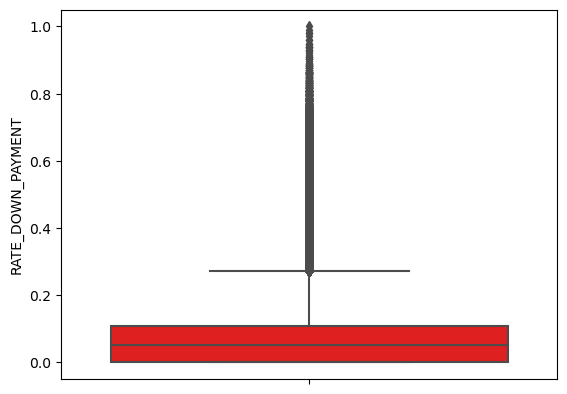

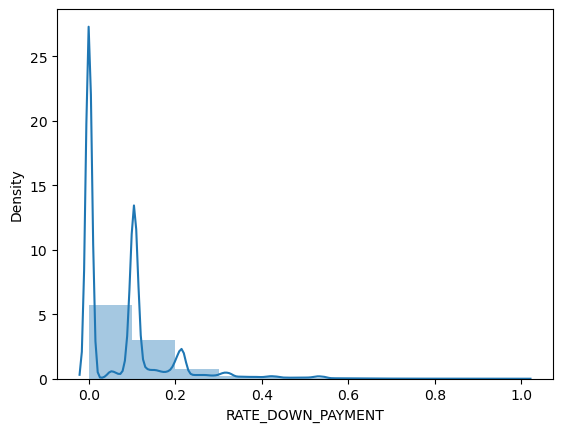

In [95]:
sns.boxplot(y=prev3.RATE_DOWN_PAYMENT, color='red')
plt.show()
sns.distplot(prev3.RATE_DOWN_PAYMENT, bins=10)
plt.show()

In [96]:
print("Outlier percentage for RATE_DOWN_PAYMENT:",round(prev3[prev3.RATE_DOWN_PAYMENT >= 0.25].shape[0]/prev3.shape[0]*100,2),"%")

Outlier percentage for RATE_DOWN_PAYMENT: 2.88 %


Findings:
1. It looks like the outliers are not random mistakes in values
2. Overall the RATE_DOWN_PAYMENT looks like the data is skewed to the left
3. There's some some interesting pattern in 0% 10% and 20% as banks tends to take round figures for down payment
However, from quantile distribution it's clear that almost 90% of the data shows less than 20% down payment rate
On an external reseaerch it is found that, most banks consider 20% downpayment, and 2.5 times of IQR can be considered outlier, in which our case IQR is around 10% that means, 25% above should be outliers
3. 94% of the data is less than 25% in DOWNPAYMENT_RATE , and less than 3% todal data is affected with these records
4. Since RATE_DOWN_PAYMENT is derived from 'AMT_DOWN_PAYMENT' and 'AMT_APPLICATION' , Trimming is not an option. The best approach is to drop records which has high downpayment rate.

In [97]:
# prev3 = prev3[prev3.RATE_DOWN_PAYMENT < 0.25]
# prev3.shape
prev4 = prev3.copy()
prev4['drop_flag'] = prev4.RATE_DOWN_PAYMENT.apply(lambda x: 1 if x>0.25 else 0)
prev4 = prev4[prev4.drop_flag == 0]
prev4 = prev4.drop('drop_flag', axis=1)

print(round(prev4.shape[0]/prev3.shape[0]*100,2))

97.12


In [98]:
#AMT_DOWN_PAYMEN has maximum value around 3060K, Which in Dollars is an impossible price for downlpayment
# Let's see how the values are distributed
round(prev4.AMT_DOWN_PAYMENT.quantile([0.25,0.5,0.75,0.85,0.9,0.95,0.99,1]),2)

0.25         0.00
0.50         0.00
0.75      6255.00
0.85      9900.00
0.90     13500.00
0.95     19345.50
0.99     40885.02
1.00    675000.00
Name: AMT_DOWN_PAYMENT, dtype: float64

In [99]:
# Let's see which all records have values higher than 40K
prev4[prev4.AMT_DOWN_PAYMENT > 300000][['NAME_CONTRACT_TYPE','RATE_DOWN_PAYMENT','AMT_DOWN_PAYMENT','AMT_APPLICATION']].head(100)

,NAME_CONTRACT_TYPE,RATE_DOWN_PAYMENT,AMT_DOWN_PAYMENT,AMT_APPLICATION
3801,Consumer loans,0.217818,489600.0,2448000.0
46508,Consumer loans,0.121678,427500.0,3826372.5
51557,Consumer loans,0.201396,337500.0,1669230.0
93224,Consumer loans,0.162205,315000.0,2115000.0
94231,Consumer loans,0.217818,368460.0,1842300.0
...,...,...,...,...
1450202,Consumer loans,0.205005,504000.0,2677500.0
1525789,Consumer loans,0.217818,337500.0,1687500.0
1613747,Consumer loans,0.136136,450000.0,3600000.0
1614695,Consumer loans,0.217818,391950.0,1959750.0


Contract types on downpayments over 100k -> ['Consumer loans']


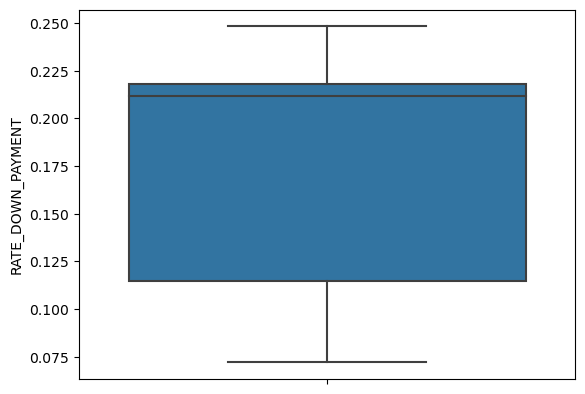

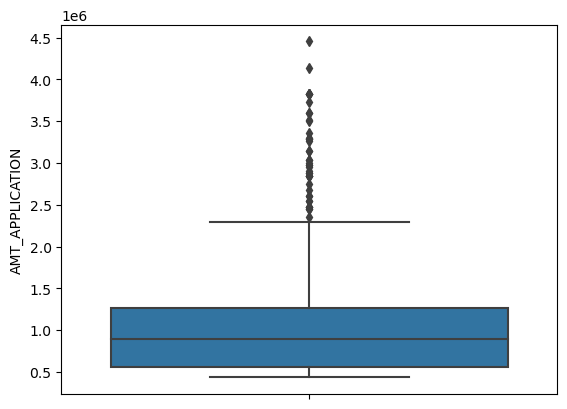

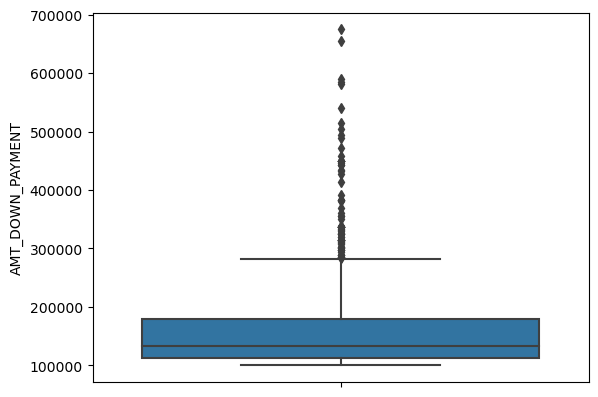

In [100]:
print("Contract types on downpayments over 100k ->",prev4[prev4.AMT_DOWN_PAYMENT > 100000]['NAME_CONTRACT_TYPE'].unique())
sns.boxplot(y=prev4[prev4.AMT_DOWN_PAYMENT > 100000]['RATE_DOWN_PAYMENT'])
plt.show()
sns.boxplot(y=prev4[prev4.AMT_DOWN_PAYMENT > 100000]['AMT_APPLICATION'])
plt.show()
sns.boxplot(y=prev4[prev4.AMT_DOWN_PAYMENT > 100000]['AMT_DOWN_PAYMENT'])
plt.show()

In [101]:
print('Values in Million')
print(round(prev4[prev4.AMT_DOWN_PAYMENT > 100000]['AMT_APPLICATION'].quantile([0.25,0.5,0.75,0.8,0.9,0.95,0.99,1])/1000000,3))

Values in Million
0.25    0.562
0.50    0.891
0.75    1.267
0.80    1.350
0.90    1.633
0.95    2.205
0.99    3.402
1.00    4.455
Name: AMT_APPLICATION, dtype: float64


In [102]:
columns_data[(columns_data.Table == 'previous_application.csv') & (columns_data.Row == 'SELLERPLACE_AREA')].Description.values[0]

'Selling area of seller place of the previous application'

<Axes: >

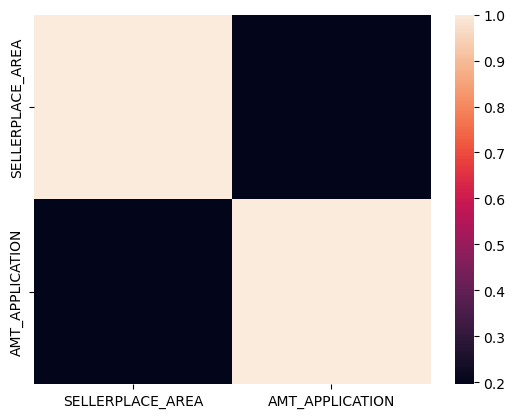

In [103]:
sns.heatmap(prev4[prev4.SELLERPLACE_AREA >= 100000][['SELLERPLACE_AREA','AMT_APPLICATION']].corr(),)

In [104]:
#Let's drop the SELLERPLACE_AREA column

prev4 = prev4.drop(['SELLERPLACE_AREA'],axis=1)

In [105]:
# Add data check point
prev5 = prev4.copy()
prev5.RATE_DOWN_PAYMENT = prev5.RATE_DOWN_PAYMENT.apply(lambda x: round(x*100,2))
amt_cols = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE']
for col in amt_cols:
    prev5[col] = prev5[col].apply(lambda x: round(x/1000,2))

In [106]:
prev5.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1621743.0,1.923652e+06,532565.491320,1000001.0,1462577.50,1923918.00,2384915.50,2845382.00
SK_ID_CURR,1621742.0,2.783514e+05,102817.372653,100001.0,189336.25,278693.00,367537.75,456255.00
AMT_ANNUITY,1249854.0,1.621804e+01,14.912210,0.0,6.48,11.31,21.16,418.06
AMT_APPLICATION,1621743.0,1.776489e+02,295.644902,0.0,16.88,71.67,189.00,6905.16
AMT_CREDIT,1621742.0,2.001331e+02,322.031027,0.0,24.10,83.53,225.00,6905.16
AMT_DOWN_PAYMENT,726245.0,4.749092e+00,10.551037,0.0,0.00,0.00,6.25,675.00
AMT_GOODS_PRICE,1236574.0,2.330131e+02,318.984449,0.0,52.10,112.50,247.50,6905.16
HOUR_APPR_PROCESS_START,1621743.0,1.246547e+01,3.331486,0.0,10.00,12.00,15.00,23.00
NFLAG_LAST_APPL_IN_DAY,1621743.0,9.963681e-01,0.060156,0.0,1.00,1.00,1.00,1.00
RATE_DOWN_PAYMENT,726245.0,5.910610e+00,6.901131,0.0,0.00,0.00,10.89,25.00


Since some of these columns can be only used for consumer loan. I'll create 2 df frame for each

In [107]:
prev6 = prev5.copy()
prev6_cons = prev5.copy()
prev6 = prev6.drop(['DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL','AMT_ANNUITY','CNT_PAYMENT','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','AMT_GOODS_PRICE'],axis=1)

In [108]:
print(prev6_cons.shape)
prev6_cons.head()

(1621743, 27)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877.0,Consumer loans,1.73,17.14,17.14,0.0,17.14,SATURDAY,15,1,0.0,Approved,73,Cash through the bank,Repeater,Mobile,POS,Country-wide,Connectivity,12.0,middle,42.0,300.0,42.0,37.0,0.0
1,2802425,108129.0,Cash loans,25.19,607.50,679.67,NaN,607.50,THURSDAY,11,1,NaN,Approved,164,XNA,Repeater,XNA,Cash,Contact center,XNA,36.0,low,134.0,916.0,NaN,NaN,1.0
2,2523466,122040.0,Cash loans,15.06,112.50,136.44,NaN,112.50,TUESDAY,11,1,NaN,Approved,301,Cash through the bank,Repeater,XNA,Cash,Credit and cash offices,XNA,12.0,high,271.0,59.0,NaN,NaN,1.0
3,2819243,176158.0,Cash loans,47.04,450.00,470.79,NaN,450.00,MONDAY,7,1,NaN,Approved,512,Cash through the bank,Repeater,XNA,Cash,Credit and cash offices,XNA,12.0,middle,482.0,152.0,182.0,177.0,1.0
4,1784265,202054.0,Cash loans,31.92,337.50,404.06,NaN,337.50,THURSDAY,9,1,NaN,Refused,781,Cash through the bank,Repeater,XNA,Cash,Credit and cash offices,XNA,24.0,high,NaN,NaN,NaN,NaN,NaN


In [109]:
prev6[prev6.AMT_CREDIT.isnull() == True]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
1127152,2204450,438387.0,Revolving loans,0.0,NaN,FRIDAY,10,1,Approved,608,XNA,Repeater,XNA,Cards,Country-wide,Connectivity,XNA


In [110]:
# Let's have a final check for null values 
prev_missing = pd.DataFrame(prev6.isnull().sum())
prev_missing.columns = ['missing']
prev_missing['%'] = round(prev6.isnull().sum()/prev6.shape[0]*100,2)
print(prev_missing)

                            missing    %
SK_ID_PREV                        0  0.0
SK_ID_CURR                        1  0.0
NAME_CONTRACT_TYPE                0  0.0
AMT_APPLICATION                   0  0.0
AMT_CREDIT                        1  0.0
WEEKDAY_APPR_PROCESS_START        0  0.0
HOUR_APPR_PROCESS_START           0  0.0
NFLAG_LAST_APPL_IN_DAY            0  0.0
NAME_CONTRACT_STATUS              0  0.0
DAYS_DECISION                     0  0.0
NAME_PAYMENT_TYPE                 0  0.0
NAME_CLIENT_TYPE                  0  0.0
NAME_GOODS_CATEGORY               0  0.0
NAME_PORTFOLIO                    0  0.0
CHANNEL_TYPE                      0  0.0
NAME_SELLER_INDUSTRY              0  0.0
NAME_YIELD_GROUP                  0  0.0


In [111]:
# We have 2 records which has 1 column missing. This was overlooked isnce we followed % for missing values
# Let's drop these columns as AMT_CREDIT will probably have correlation between other features
# SK_ID_CURR can't be filled
prev_missing[prev_missing.missing>0]

,missing,%
SK_ID_CURR,1,0.0
AMT_CREDIT,1,0.0


In [112]:
prev6 = prev6.dropna(axis=0, how='any', subset=['SK_ID_CURR','AMT_CREDIT'])
prev6.isna().sum()

SK_ID_PREV                    0
SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
AMT_APPLICATION               0
AMT_CREDIT                    0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
NFLAG_LAST_APPL_IN_DAY        0
NAME_CONTRACT_STATUS          0
DAYS_DECISION                 0
NAME_PAYMENT_TYPE             0
NAME_CLIENT_TYPE              0
NAME_GOODS_CATEGORY           0
NAME_PORTFOLIO                0
CHANNEL_TYPE                  0
NAME_SELLER_INDUSTRY          0
NAME_YIELD_GROUP              0
dtype: int64

In [113]:
# Let's convert the SK_ID_CURR from float to int, We had missing values as blockers before
prev6.SK_ID_CURR = prev6.SK_ID_CURR.astype(int)

In [114]:
prev6_cons = prev6_cons.dropna(axis=0, how='any', subset=['SK_ID_CURR','AMT_CREDIT'])
prev6_cons[['SK_ID_CURR','AMT_CREDIT']].isna().sum()

SK_ID_CURR    0
AMT_CREDIT    0
dtype: int64

In [115]:
# Let's repeate the SK_ID_CURR conversion again here
prev6_cons.SK_ID_CURR = prev6_cons.SK_ID_CURR.astype(int)

In [116]:
prev6.to_csv('EDA_previous_application.csv')
data4.to_csv('EDA_current_application.csv')
#df with columns which has columns associated with consumer loans
prev6_cons.to_csv('EDA_previous_application_consumer.csv')